<a href="https://colab.research.google.com/github/TMTucker1/DAS511/blob/main/DAS511_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import plotly.express as px
import numpy as np

from google.colab import files
uploaded = files.upload()



Saving report_util.py to report_util.py


In [27]:
import report_util
data = pd.read_csv('Software3.csv', delimiter=',', header=0)
df = pd.DataFrame(data)

#initial Functions
Total_Count = data['ID'].count()
Vendor_Count = data['ProductVendor'].value_counts().to_frame()
Vendor_Count_Persentage = data['ProductVendor'].value_counts(normalize=True).to_frame()*100
#GroupBys
Vendor_GB = df.groupby('ProductVendor').count().reset_index()
Vendor_GB1 = df.groupby('ProductVendor')['SoftwareLocation'].value_counts()
Vendor_GB2 = df.groupby('ProductVendor')['SoftwareType'].value_counts()
Location_GB1 = df.groupby('SoftwareLocation').count().reset_index()

#Max license info
Vendor_Max_num = Vendor_Count.max().tolist()
Vendor_Max_idx = Vendor_Count.idxmax(axis = 0).tolist()
Vendor_Max_P = Vendor_Count_Persentage.max().tolist()
#Min license info
Vendor_Min_num = Vendor_Count.min().tolist()
Vendor_Min_idx = Vendor_Count.idxmin(axis = 0).tolist()
Vendor_Min_P = Vendor_Count_Persentage.min().tolist()

def generate_report(dataset):
    report = report_util.Report("Evaluation of Software License Utilization")

    section = report.add_section("Dataset Stats")

    paragraph = section.add_paragraph()
    
  

#Paragraph #1
    paragraph.append(f"The dataset has {Total_Count} lines of data. ") 
    paragraph.append(f"{Vendor_Max_idx} has the largest number of licenses with {Vendor_Max_num} which equals {Vendor_Max_P}%. ")
    paragraph.append(f"{Vendor_Min_idx} has the smallest number of licenses with {Vendor_Min_num} which equals {Vendor_Min_P}%. ")
    paragraph.append(f"The dataset average value is {mean} with a standard deviation of {standard_deviation}. ")

    paragraph_2 = section.add_paragraph
#############################################################################
#SECTION 1 
#FIRST BAR GRAPH
    fig_1 = section.add_figure()
    fig_1.caption = "License counts by Vendor"
    fig_1 = px.bar(Vendor_GB,
             x='ProductVendor',
             y='ID',
             labels={'ID': 'Number of Licenses', 'ProductVendor':'Name of Vendor'},
             title='License Count by Vendor',
             barmode ='stack')
    fig_1.show()

    paragraph_2.append_cross_reference(fig_1)
    paragraph_2.append(f" shows the amount of licenses each vendor is utilizing.")

#Create Table
    tbl_1 = section.add_table()
    tbl_1.caption = "Figure 1 Dataset"

    tbl_1.set_header(["Product Vendor","Number of Licenses","Persentage of Total"])
    tbl_1.set_data( )
        
    paragraph_2.append_cross_reference(tbl_1)
    paragraph_2.append(f" shows the numbers in the dataset with some other properties of these numbers. ")

##########################################################################
#SECTION 2
    section_2 = report.add_section("License Count by Environment Location")
    paragraph_3 = section_2.add_paragraph()

#Figure 2
    fig_2 = section.add_figure()

# Bar chart
    fig_2 = px.bar(Location_GB1,
             x='SoftwareLocation',
             y='ID',
             labels={'ID': 'Number of Licenses', 'SoftwareLocation':'Location of Software'},
             title ='License Count by Location',
             barmode ='stack')
# plot
    fig_2.show()

    paragraph_3.append_cross_reference(fig_2)
##########################################################################





print("1-------")
print(Vendor_Max_idx, Vendor_Max_num, Vendor_Max_P) 
print("2-------")
print(Vendor_Min_idx, Vendor_Min_num, Vendor_Min_P)
print(Vendor_GB1)
print("3-------")
print(Vendor_GB2)
print("4-------")
#print(Vendor_Count)
print("5-------")
#print(Vendor_Count_Persentage)
print("6-------")

1-------
['Microsoft'] [43] [15.75091575091575]
2-------
['MicroFocus'] [6] [2.197802197802198]
ProductVendor       SoftwareLocation
Adobe               Development          6
                    Production           1
Amazon Web Service  Development          7
                    Production           3
Apache              Production          18
                    Development          3
                    Exercise             2
                    Other                1
HID                 Development          5
                    Production           2
IBM                 Production          30
                    Development          3
JetBrains           Development          8
                    Production           1
Linux Foundation    Production           5
                    Development          3
                    Other                2
McAfee              Development         12
                    Production           8
                    Other                3
MicroFo

In [35]:
Vendor_GB1 = df.groupby('ProductVendor')['SoftwareLocation'].value_counts()
Location_GB1 = df.groupby('SoftwareLocation').count().reset_index()
fig1 = px.bar(Location_GB1,
             x='SoftwareLocation',
             y='ID',
             labels={'ID': 'Number of Licenses', 'SoftwareLocation':'Location of Software'},
             title ='License Count by Location',
             barmode ='stack')
fig1.show()

In [ ]:
data = pd.read_csv('Software3.csv', delimiter=',', header=0)
df = pd.DataFrame(data)


Vendor_Count = data['ProductVendor'].value_counts()
print(Vendor_Count)
Total_Count = data['ID'].count()
print("Total Count is:", Total_Count)
Environment_Count = data['SoftwareLocation'].value_counts()
print("Environemnt count:")
print(Environment_Count)
Software_Type = data['SoftwareType'].value_counts()
print("Software Type:")
print(Software_Type)

Microsoft             43
IBM                   34
Oracle                33
Oracle Siebel         30
Apache                25
McAfee                23
VMware                15
Mozilla               12
Amazon Web Service    10
Linux Foundation      10
JetBrains              9
MongoDB                8
HID                    7
Adobe                  7
MicroFocus             6
Jenkins                4
Inetsoft               4
Jetbrains              1
Name: ProductVendor, dtype: int64
Total Count is: 281
Environemnt count:
Production     137
Development    124
Other            8
Exercise         6
Name: SoftwareLocation, dtype: int64
Software Type:
COTS           200
Open Source     48
Freeware        23
IaaS             4
PaaS             3
SaaS             1
Other            1
GOTS             1
Name: SoftwareType, dtype: int64


In [ ]:
  
# Read and group product vendor
dfg=df.groupby('ProductVendor').count().reset_index()

# Bar chart
fig = px.bar(dfg,
             x='ProductVendor',
             y='ID',
             labels={'ID': 'Number of Licenses', 'ProductVendor':'Name of Vendor'},
             title='License Count by Vendor',
             barmode ='stack')
# plot
fig.show()

#read and group by location
dfg1=df.groupby('SoftwareLocation').count().reset_index()

# Bar chart
fig1 = px.bar(dfg1,
             x='SoftwareLocation',
             y='ID',
             labels={'ID': 'Number of Licenses', 'SoftwareLocation':'Location of Software'},
             title ='License Count by Location',
             barmode ='stack')
# plot
fig1.show()



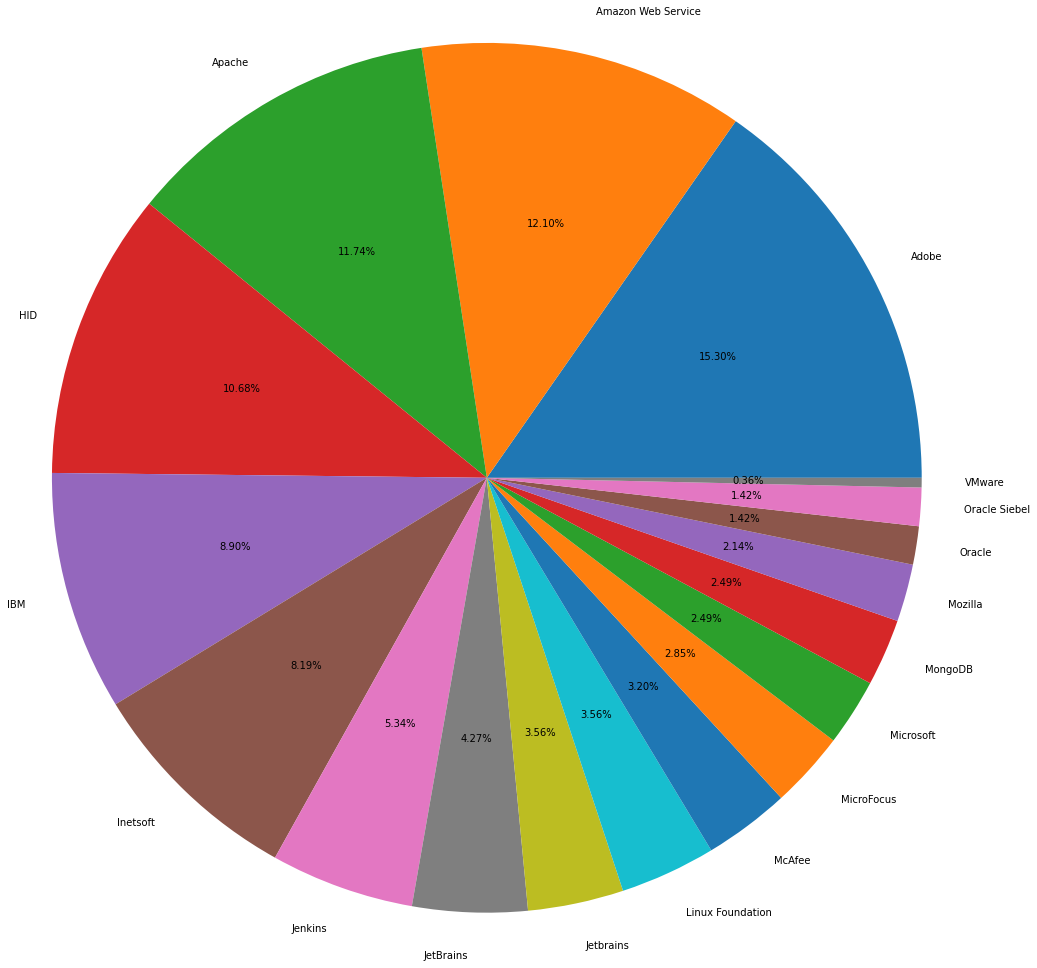

In [ ]:
labels = df['ProductVendor'].unique().tolist()
Vendor_Count = df['ProductVendor'].value_counts()
plt.pie(Vendor_Count, 
        labels = labels,
        autopct='%1.2f%%', 
        radius = 5,)

plt.show()


In [ ]:
Prod_Environment = df[df.SoftwareLocation == 'Production']
Dev_Environment = df[df.SoftwareLocation == 'Development']
#Prod_Environment.groupby('ProductVendor').count()
#Dev_Environment.groupby('ProductVendor').count()

index = ['ProductVendor']
dfb = pd.DataFrame({'Prod_Environment': Prod_Environment, 'Dev_E' : Dev_Environment, index:index})

ax = df.plot.barh(stacked=True)
#fig, ax = plt.subplots()

#ax.bar(Prod_Environment, width, label='Prod')
#ax.bar(Dev_Environment, width,  bottom=Prod_Environment,
 #      label='Dev')

#ax.set_ylabel('Count')
#ax.set_title('Environment by location')
#ax.legend()


#plt.show()

TypeError: ignored

In [ ]:

fig = px.bar(df, x="ProductVendor", 
             y="ID",
             hover_data = ["ProductName", "SoftwareType"],
             labels={'ID': 'Environment Sotware is Located', 'ProductVendor': 'Name of Vendor'}, 
             
             title = "Vendor counts by Environment")

barmode = 'stack',

fig.show()